# PROJECT 2 : TEAM 11

Members: Talia Tandler, SeungU Lyu

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import math

http://www.worldometers.info/world-population/us-population/
US pop in 2017 = 324,459,463

https://wwwnc.cdc.gov/travel/yellowbook/2018/infectious-diseases-related-to-travel/measles-rubeola
Measles incubation period 11 days average, infectious period 2-4 days before rash to after rash.

In [40]:
pop = 999  #population
init_im = 0.85    #initial immunity of the US population
beta = 0.9
gamma = 1/7      #US recovery rate from measles
sigma = 0.091     #US rate from exposure period of 11 days to infected

0.091

# What will be the result of lowering immunity rate for measles in a small community during a outbreak?

Measles is a highly infectious disease that can infect about 90% of people come to contact with the patient. However, the disease is not treated dangerous these days because of the MMR vaccination, which can effectively prevent people to get the disease. Due to the high vaccination rate, THe United States declared free of circulating measles in 2000 with 911 cases from 2001 to 2011. The only occurrences of measles nowadays in the U.S is due to importation from other countries. Because of its high infectious rate upon contact, herd immunity is considered really important for measles. 

In 2015, Disney Measles Outbreak happened, causing more than 159 people to be infected during a single outbreak countrywide. Only 50~86% people exposed to this outbreak were vaccinated, causing a bigger outbreak. Recent Anti-Vaccination Movement in the U.S was pointed out to be the major reason, lowering the population immunity rate, causing the herd immunity to not function as expected. Starter of this movement, Andrew Wakefield, stated that MMR vaccination can cause Autism to newborn children with the mercury content inside the specific vaccine. Due to the fear of getting an autistic child, a number of parents refused to vaccinate their children.

This simulation looks to find the effect of changing the immunity rate of a community toward measles to check out the effectiveness of vaccination toward the disease. 

### Methodology

In order to creat this model, we:

1. Did background research on MMR vaccination and the measles diseases and found a set of constants we would implement in our model.
2. Put the variables into a state function.
3. Set the initial population to 1000, and one person infected with measles.
4. Ran the simulation based on measles infections every day.
5. Set a condition where the outbreak ends when the infected people is less than one person. 
6. Created graphs to visually represent our results.

In [16]:
def make_system (pop, init_im, beta, gamma, sigma):
    """Make a system object for the SCIR model
    
    pop: Total US population
    init_im: Initial Population Immunity
    gamm: recovery rate for infected people
    sigma: rate of incubation group moving to infectious group
    return: System object"""
    
    init = State(S = int(pop*(1 - init_im)), E = 0, I = 1, R = int(pop*init_im))
    init /= np.sum(init)
    #S: susceptible, E: exposed period, I: infected, R: recovered(immune to disease)
    
    t0 = 0
    t_end = 365 #number of days in 1 year
    
    return System(init = init,
                  beta = beta,
                  gamma = gamma,
                  sigma = sigma,
                  t0 = t0,
                  t_end = t_end,
                  init_im = init_im)

In [67]:
def update_func(state, time, system):
    """Update the SEIR model
    
    state: starting variables of SEIR
    t: time step
    system: includes alpha,beta,gamma,omega rates
    contact: current contact number for the state
    
    """
    
    unpack(system)
    
    s,e,i,r = state
    
#    if time>30 and i<0.001:
#        e = 0
#        i = 0
            
    #current population
    total_pop = s+e+i+r
    
    #change rate for each status
    ds = (-beta*s*i)/total_pop #change in number of people susceptible
    de = ((beta*s*i)/total_pop) - sigma*e #change in number of people moving to exposed period
    di = sigma*e - gamma*i     #change in people moving to infectious period
    dr = gamma*i     #change in people recovered

    s += ds      #number of people susceptible
    e += de      #number of people exposed
    i += di      #number of people infected
    r += dr      #number of people recovered
    
    return State(S=s, E=e, I=i, R=r)

In [68]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    #creates timeframe to save daily states
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for time in linrange(t0, t_end):
        frame.row[time+1] = update_func(frame.row[time], time, system)
    
    return frame

In [69]:
def plot_results (S,E,I,R):
    
    plot(S, '--', label = 'Susceptible')
    plot(E, '-', label = 'Exposded')
    plot(I, '.', label = 'Infected')
    plot(R, ':', label = 'Recovered')
    decorate(xlabel='Time (days)',
            ylabel = 'Fraction of population')

In [70]:
init_im = 0.8
system = make_system(pop, init_im, beta, gamma, sigma)
results = run_simulation(system, update_func)
results
#plot(results.I)

,S,E,I,R
0,0.199199,0.000000,0.001001,0.799800
1,0.199020,0.000179,0.000858,0.799943
2,0.198866,0.000317,0.000752,0.800065
3,0.198732,0.000423,0.000673,0.800173
4,0.198611,0.000504,0.000615,0.800269
5,0.198501,0.000569,0.000573,0.800357
6,0.198399,0.000619,0.000543,0.800439
7,0.198302,0.000660,0.000522,0.800516
8,0.198208,0.000693,0.000508,0.800591
9,0.198118,0.000721,0.000498,0.800663


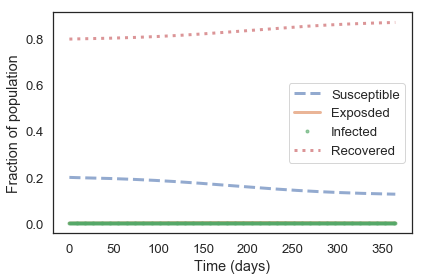

In [71]:
plot_results(results.S, results.E, results.I, results.R)

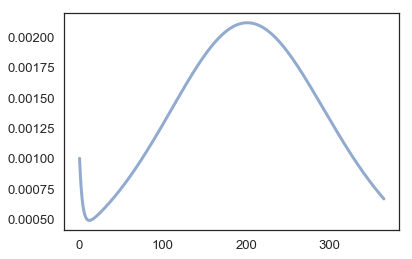

In [76]:
plot(results.I)

In [23]:
def calc_highest_infected(results):
    """Fraction of population infected during the simulation.
    
    results: DataFrame with columns S, I, R
    
    returns: fraction of population
    """
    return max(results.I)

In [73]:
def calc_fraction_infected(results):

    return (get_first_value(results.S) - get_last_value(results.S))/get_first_value(results.S)

In [51]:
def sweep_init_im(imun_rate_array):
    """Sweep a range of values for beta.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for init_im in imun_rate_array:
        system = make_system(pop, init_im, beta, gamma, sigma)
        results = run_simulation(system, update_func)
        sweep[system.init_im] = calc_highest_infected(results)*pop
    return sweep

In [74]:
def sweep_init_im2(imun_rate_array):
    """Sweep a range of values for beta.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for init_im in imun_rate_array:
        system = make_system(pop, init_im, beta, gamma, sigma)
        results = run_simulation(system, update_func)
        sweep[system.init_im] = calc_fraction_infected(results)*100
    return sweep

In [75]:
imun_rate_array = linspace(0, 1, 50)
sweep = sweep_init_im2(imun_rate_array) 
sweep

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,values
0.000000,99.880178
0.020408,99.860820
0.040816,99.838421
0.061224,99.811116
0.081633,99.780944
0.102041,99.746068
0.122449,99.703597
0.142857,99.656702
0.163265,99.599614
0.183673,99.536599


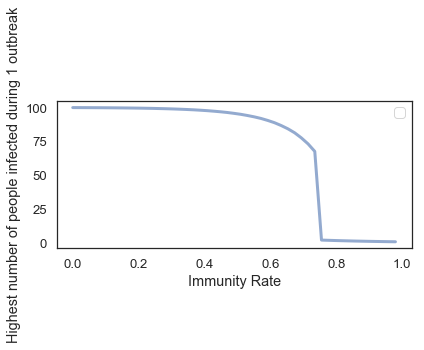

In [49]:
plot(sweep)
decorate(xlabel='Immunity Rate',
        ylabel = 'Highest number of people infected during 1 outbreak')

## Results

This model uses SEIR methodology to examine how measels would spread throughout a community of 1000 individuals with varying immunity rates. As the number of susceptible individuals decreases, the number of recovered individuals increases at an equal and opposite rate. The maximum fraction of the populate exposed to measles occurs at X days and the maximum number of infected individuals occurs at Y days. The time between these two points is when the fraction of susceptible individuals begins to decrease quickly and the recovered individuals increase quickly. It appears the measle outbreak ends at Z days as the entire population has moved into the recovery phase.

## Interpretation

As expected, as the immunity rate in the community increased, the highest number of people infected with measles during an outbreak decreased. Interestingly, the number of people infected appears to plateau at an 80% immunity rate. This result aligns with the concept of herd immunity as an indirect protection from a disease when a large percentage of a population becomes immune to the disease. In Figure 1 of our model, individuals are becoming immune to measles when they are in the recovery state and thus the oubreak is not prepetuated. In Figure 2, herd immunity is demonstrated as the number of individuals who become infected with measles decreases as the number of individuals who are immune to the disease increases.

Our model does have several limitations: